**Terms**:
- UCB: mathematical decision-making formula for solving "Exploration-Exploitation trade-off"
- UCT: Tree policy used for selection and expansion phase of MCTS. Uses UCB for finding optimal action.
<br>
Reference: Bandit based Monte-Carlo Planning
$$UCT = \frac{w_i}{n_i} +2 C_p \sqrt{\frac{2\ln N_p}{n_i}}$$

In [1]:
#!pip install numpy
#!pip install graphviz

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import random
from uct_mcts import MCTSNode
from tic_tac_toe import Tictactoe

In [19]:
game = Tictactoe()


def get_random_move():
    return random.randint(0, game.SIZE**2 - 1)


play_ai = True
# player = random.randint(0, 1)
player = 1

if player == 0:
    player = game.X
    ai = game.O
else:
    player = game.O
    ai = game.X

mcts_visual = []
while not (game.is_gameover()):
    if game.turn == player:
        # Player turn
        if play_ai:
            move = get_random_move()
            while not game.is_valid_move(move):
                move = get_random_move()

        else:
            move = get_random_move()
            while not game.is_valid_move(move):
                print("Invalid input")
                move = int(input())

        game.make_move(move)
    else:
        # MCTS AI turn
        # MCTS TURN
        root = MCTSNode(state=game)
        mcts_best_move = root.best_action(simulations_number=10)
        print("===mcts best move===", mcts_best_move)

        mcts_visual.append(root.visualize_tree(selected_node=root.best_child()))
        game.make_move(mcts_best_move)


##    else:
#        # AI turn
#        # feed all the board status to NN
#        net_output = neuralnet.feed_forward(game.export_board())
#
#        movelist = get_movelist(net_output)
#        ai_move = get_move(game, movelist)
#
#        game.make_move(ai_move)

print("\n\nFinal Board:")
game.print_board()

if game.is_gameover():
    print(str(game.winner) + " won!")
else:
    print("Draw!")

===mcts best move=== 6
===mcts best move=== 2
===mcts best move=== 8
===mcts best move=== 5


Final Board:
O|O|X
O|_|X
X|_|X
X won!


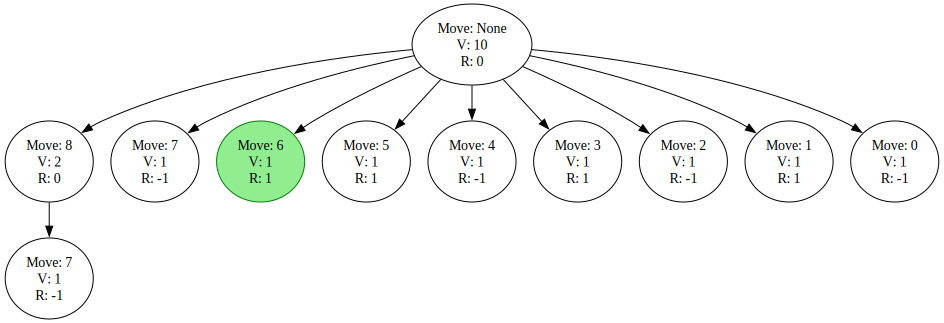

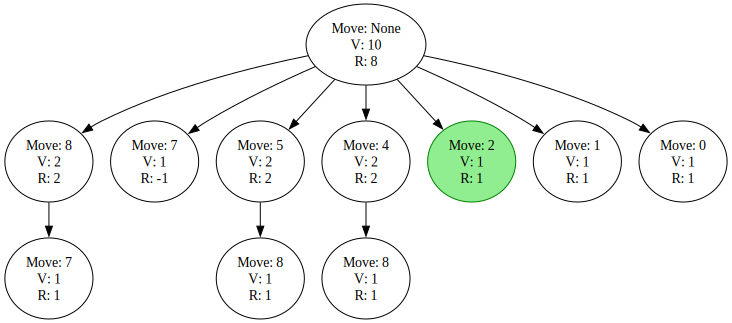

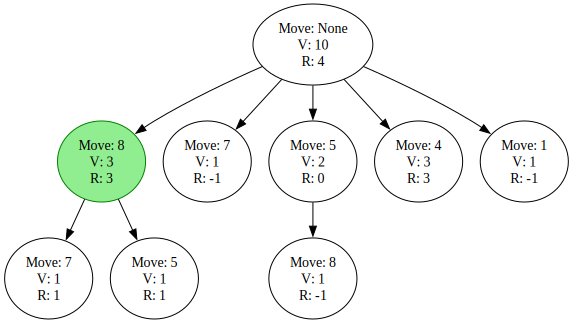

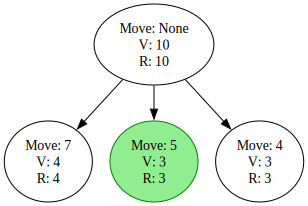

In [20]:
for i, graph in enumerate(mcts_visual):
    display(graph)